# Test the MMAR class on various tickers

In [1]:
import sys
import warnings
from pathlib import Path

import numpy as np
from IPython.display import Markdown, display

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")


if module_path not in sys.path:
    sys.path.append(module_path)


import yfinance as yf
from HurstIndexSolver.HurstIndexSolver import HurstIndexSolver
from MMAR.MMAR import MMAR

warnings.filterwarnings("ignore")

In [2]:
start_date = "2005-01-01"
end_date = "2018-12-31"
tickers = ["AAPL", "MSFT", "IBM", "GS", "WMT", "NFLX"]

### Processing AAPL

[*********************100%%**********************]  1 of 1 completed


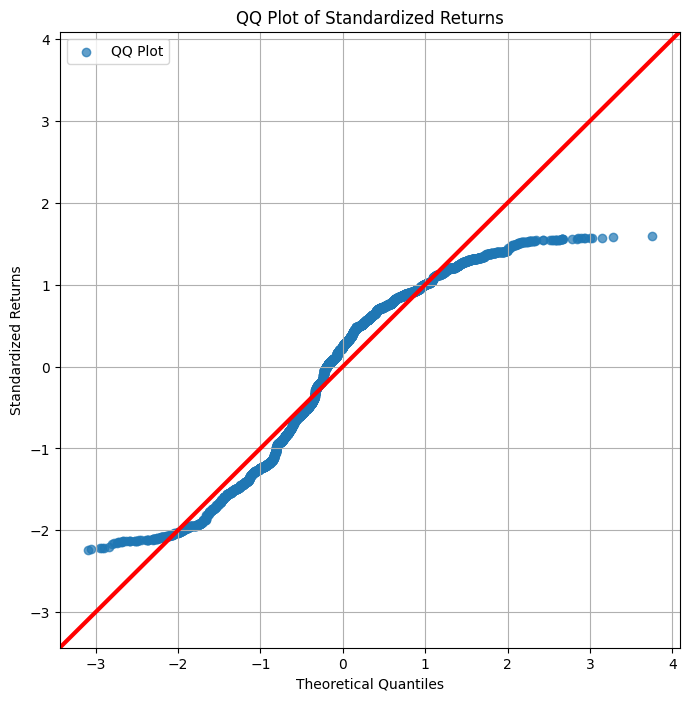

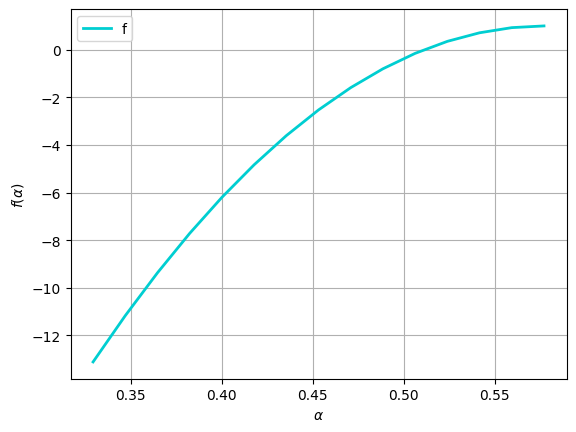

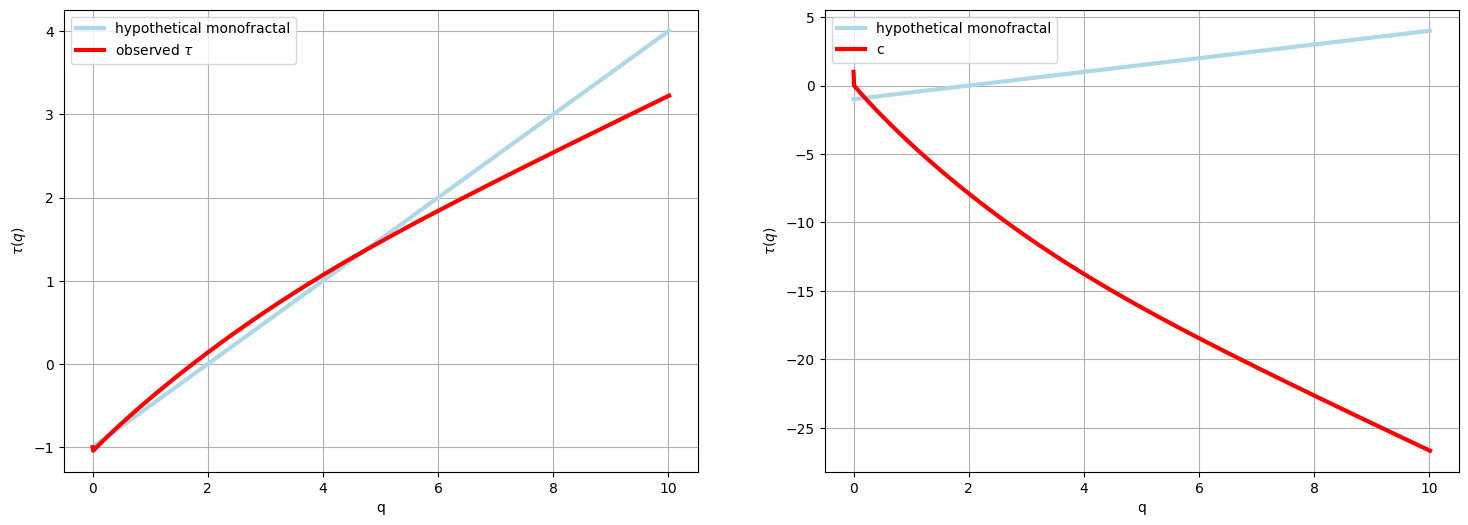

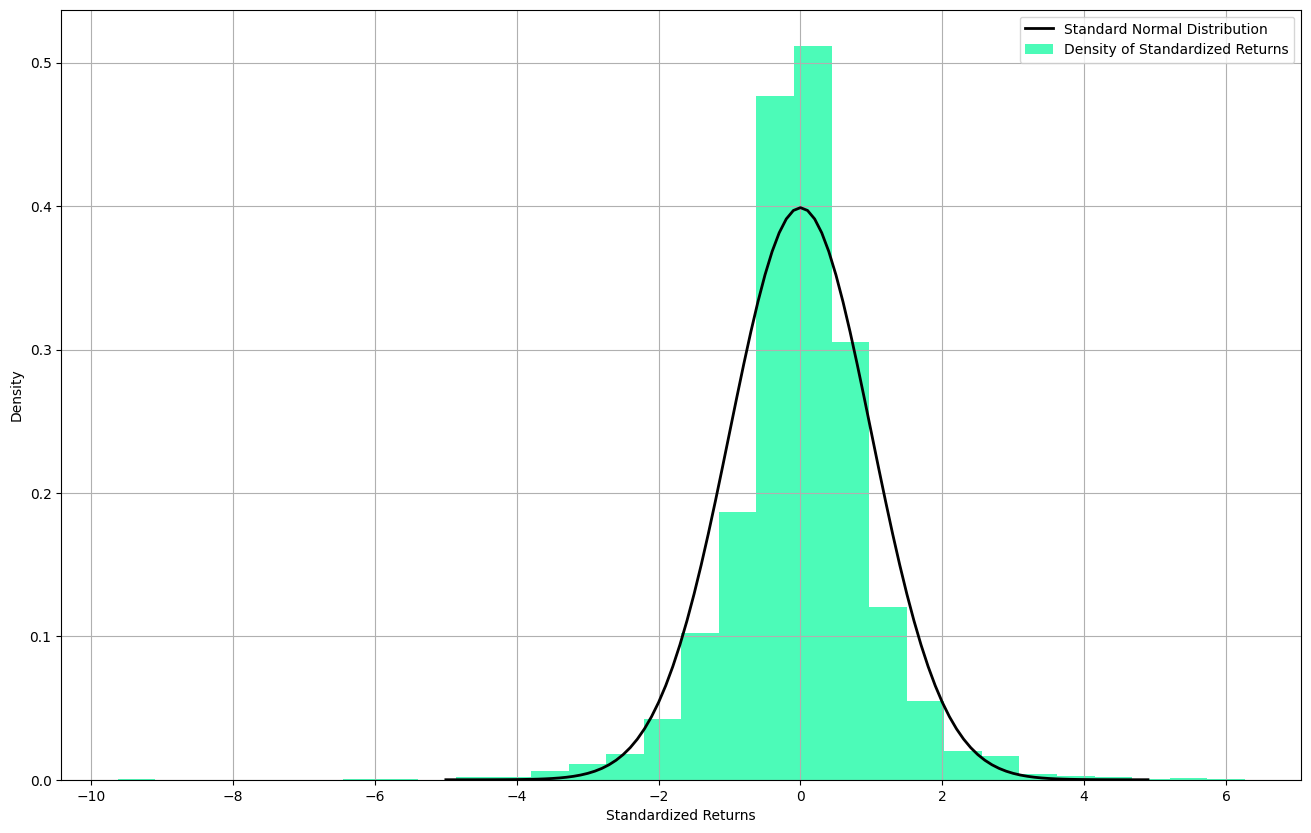

For AAPL: 
the Hurst exponent using Zhang is: 0.52 
using MMAR alpha is 0.33 and Hurst is 0.5751105200191781


### Processing MSFT

[*********************100%%**********************]  1 of 1 completed


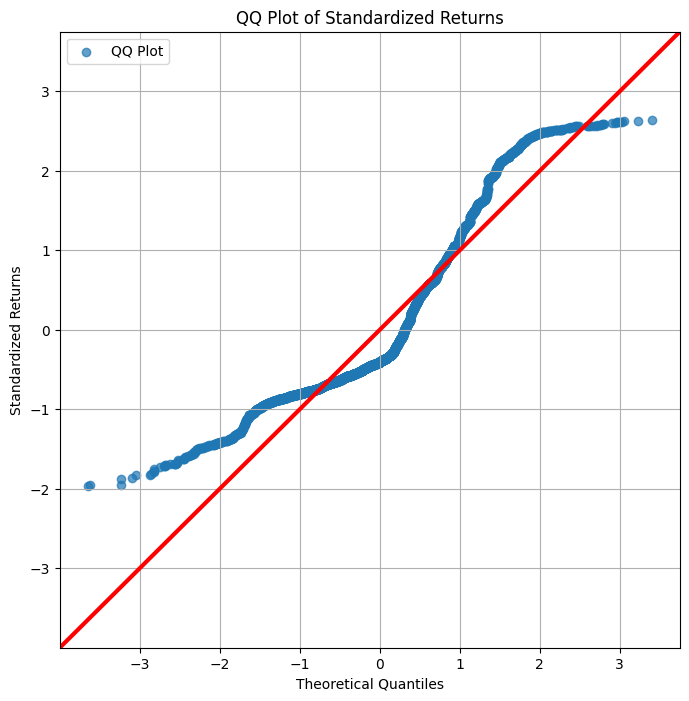

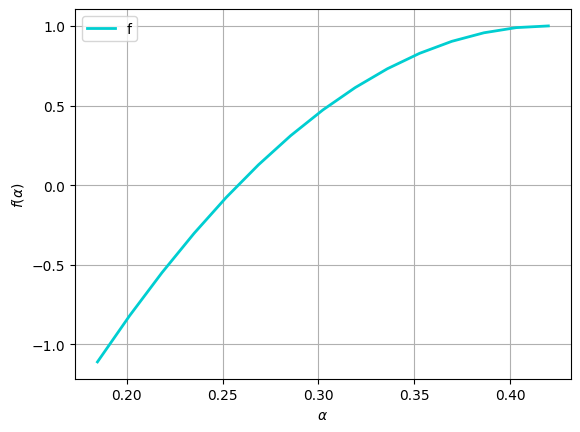

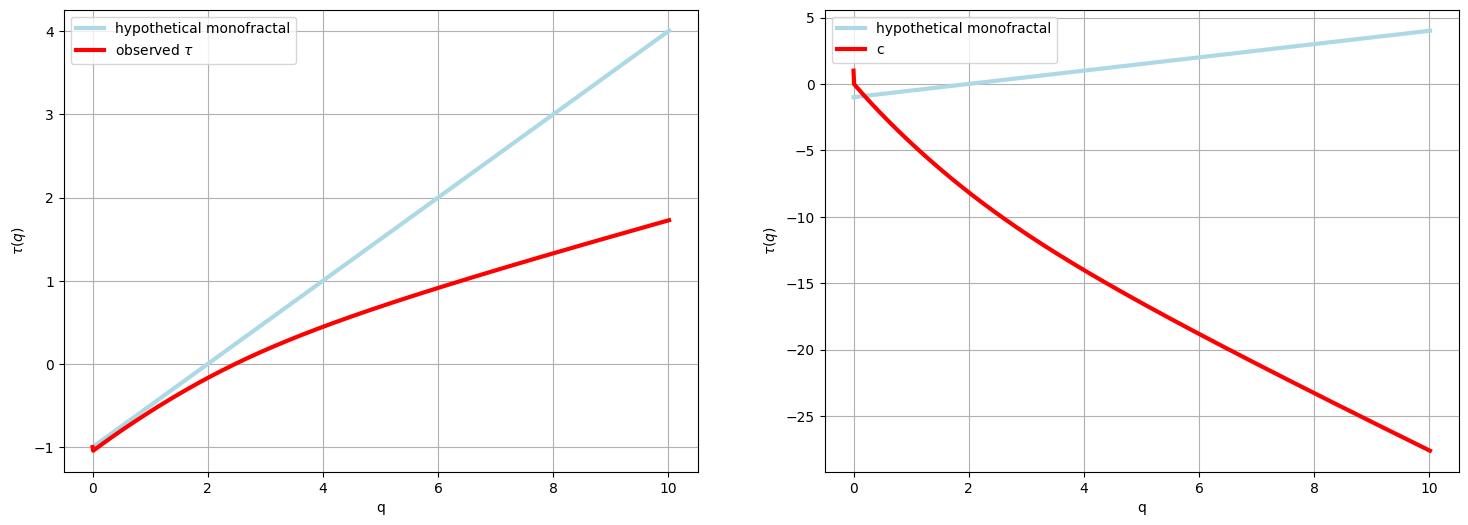

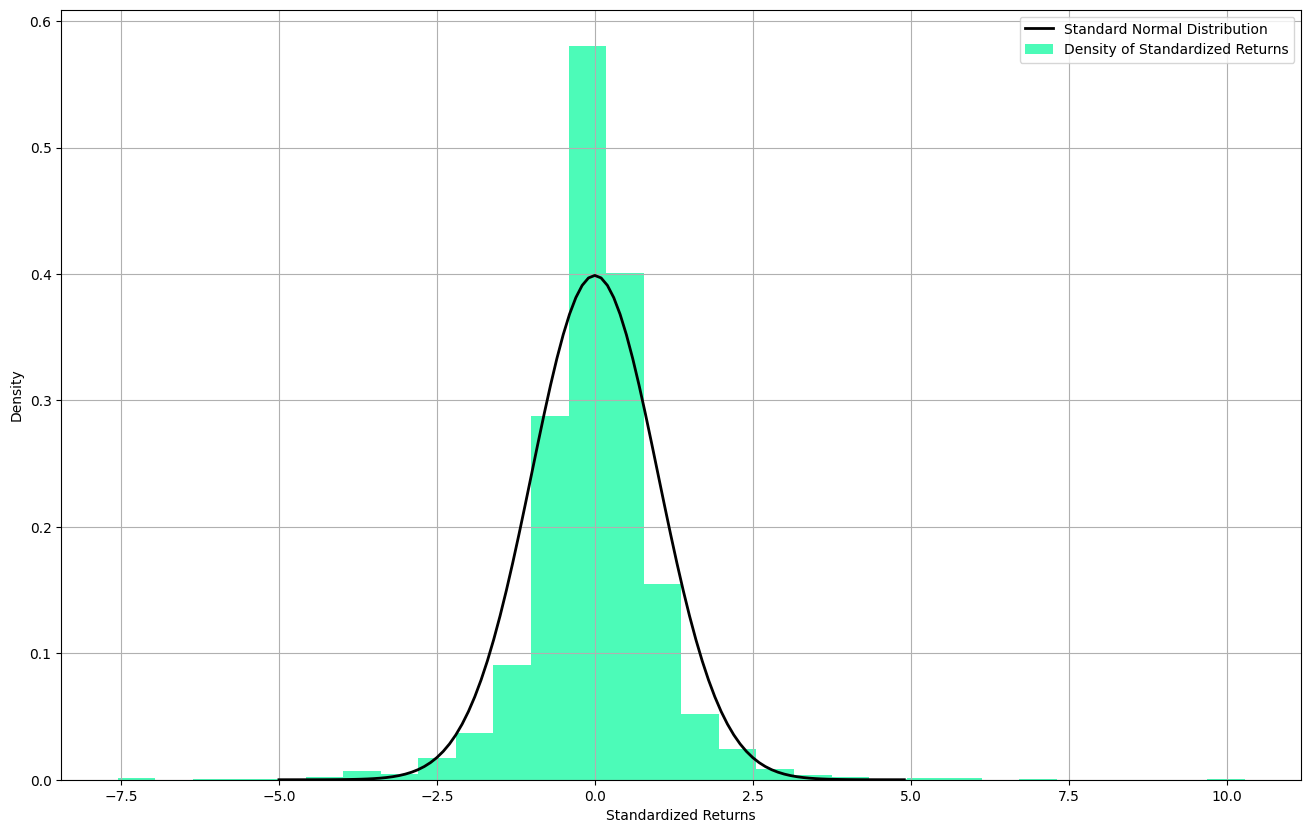

For MSFT: 
the Hurst exponent using Zhang is: 0.42 
using MMAR alpha is 0.18 and Hurst is 0.4037415067561764


### Processing IBM

[*********************100%%**********************]  1 of 1 completed


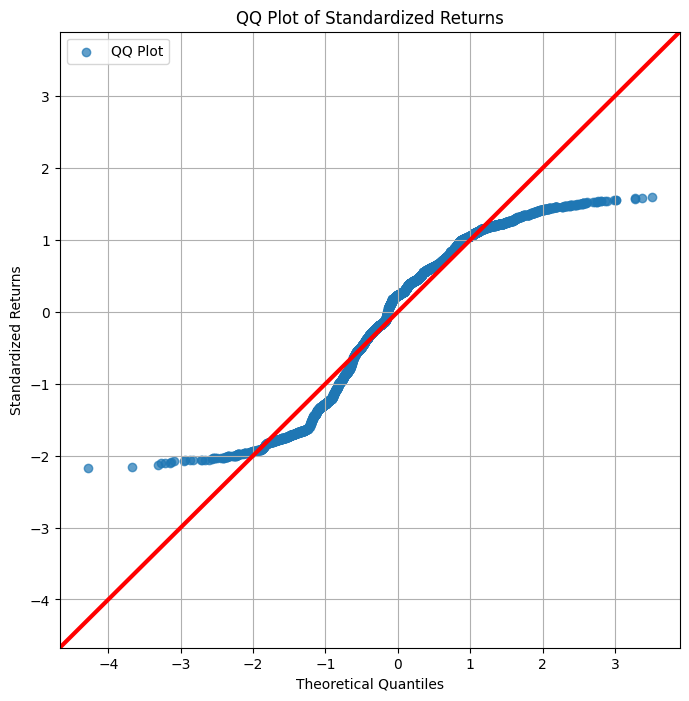

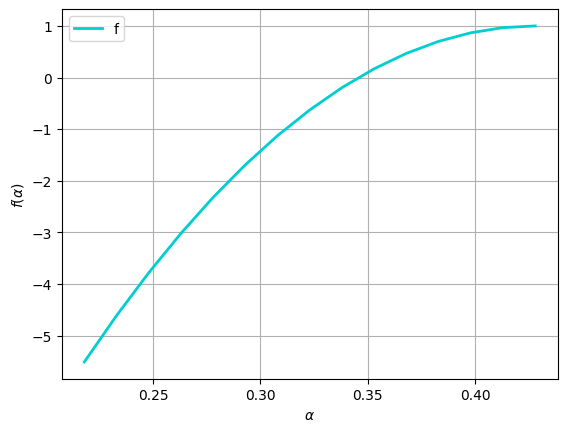

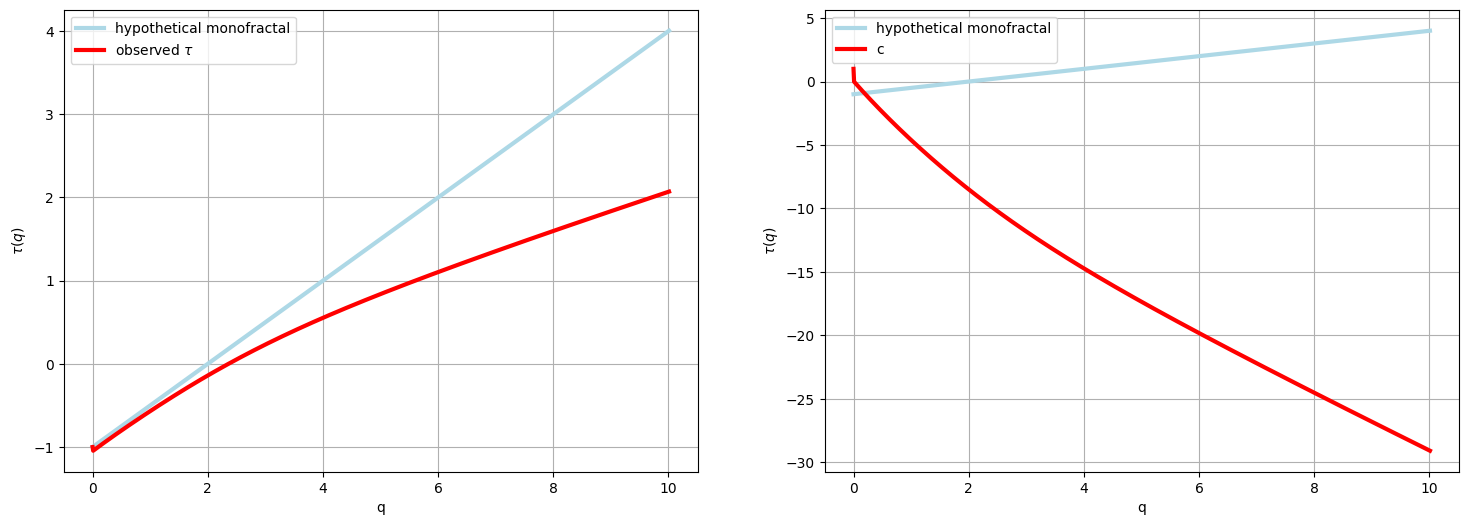

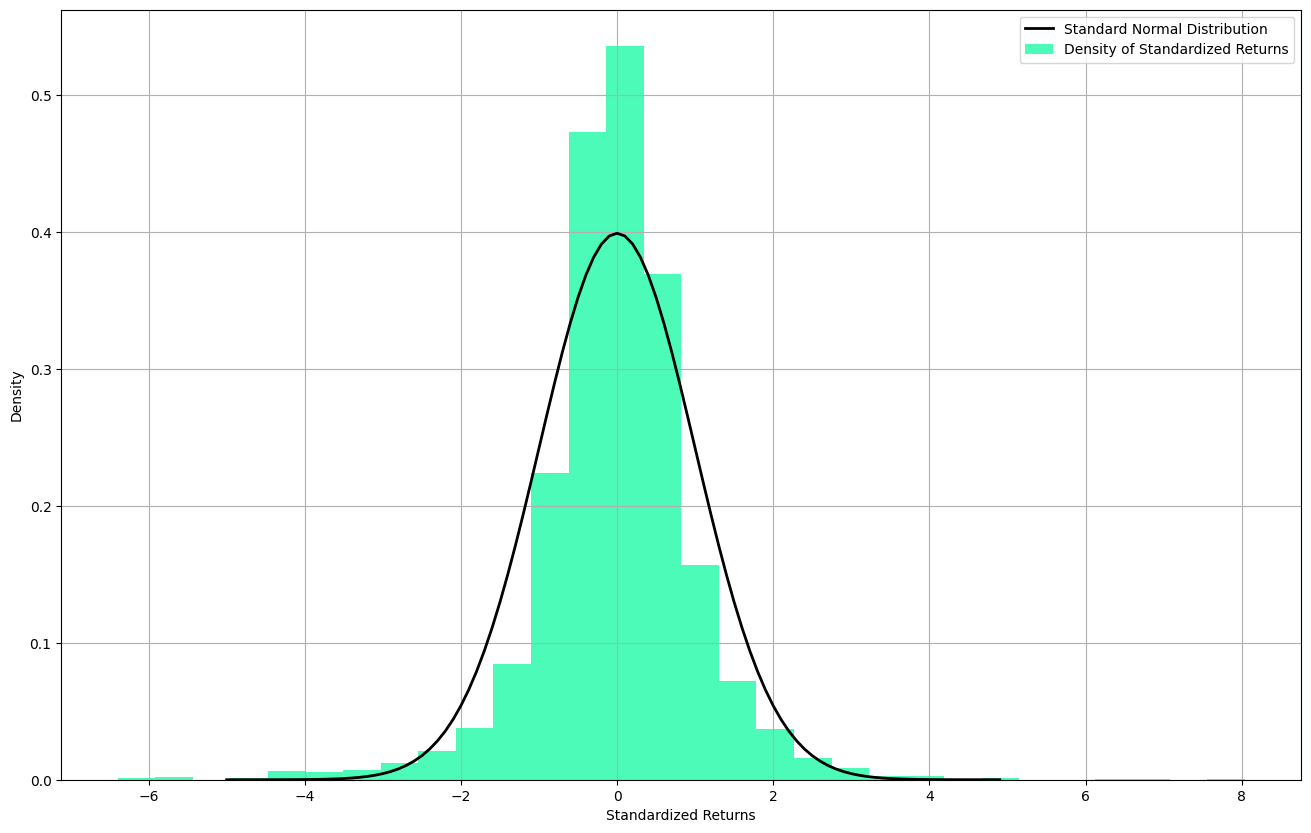

For IBM: 
the Hurst exponent using Zhang is: 0.51 
using MMAR alpha is 0.22 and Hurst is 0.424006716623071


### Processing GS

[*********************100%%**********************]  1 of 1 completed


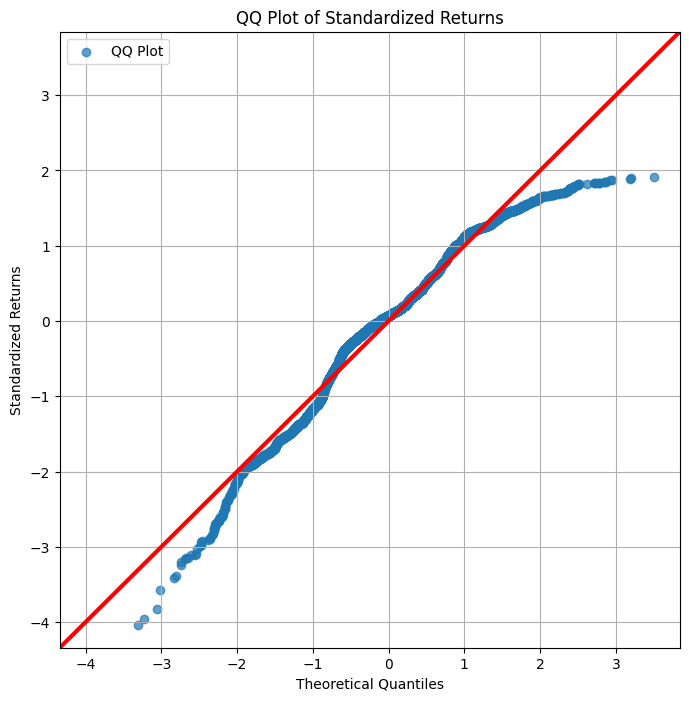

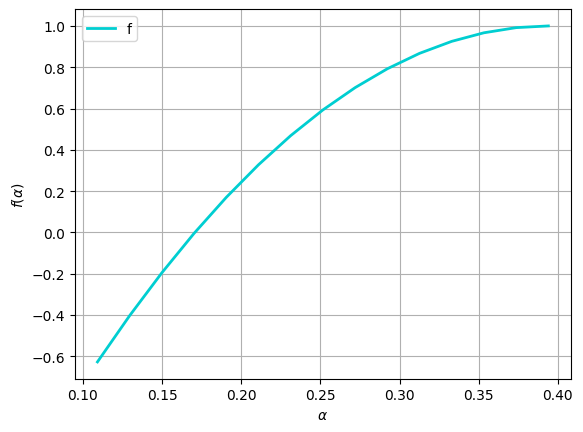

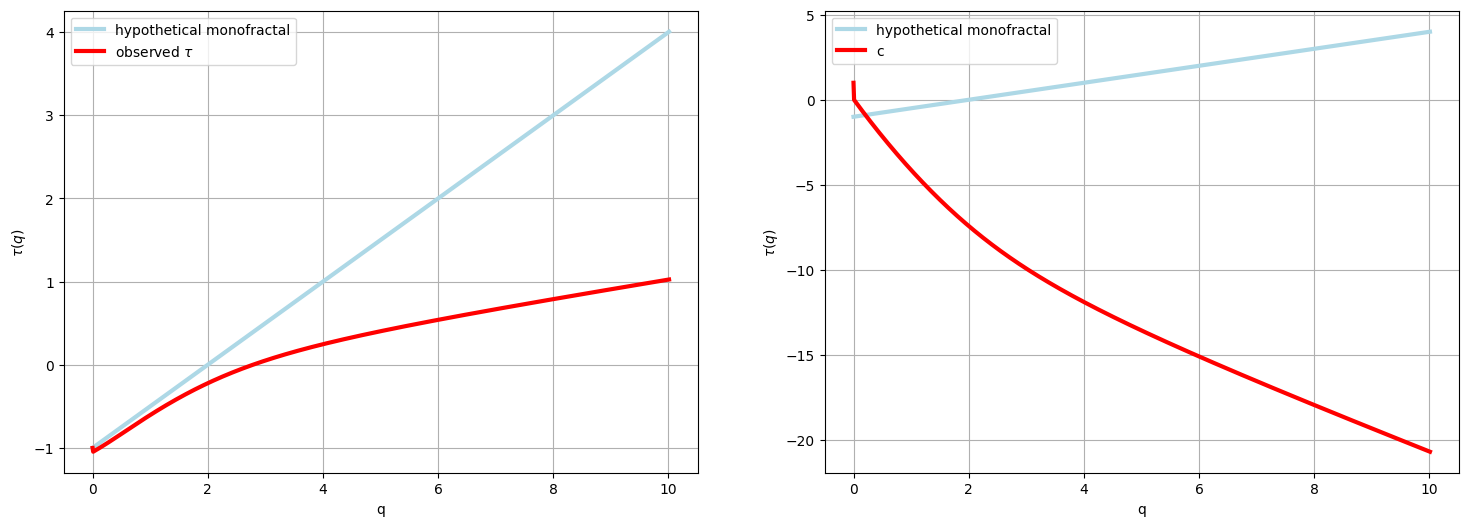

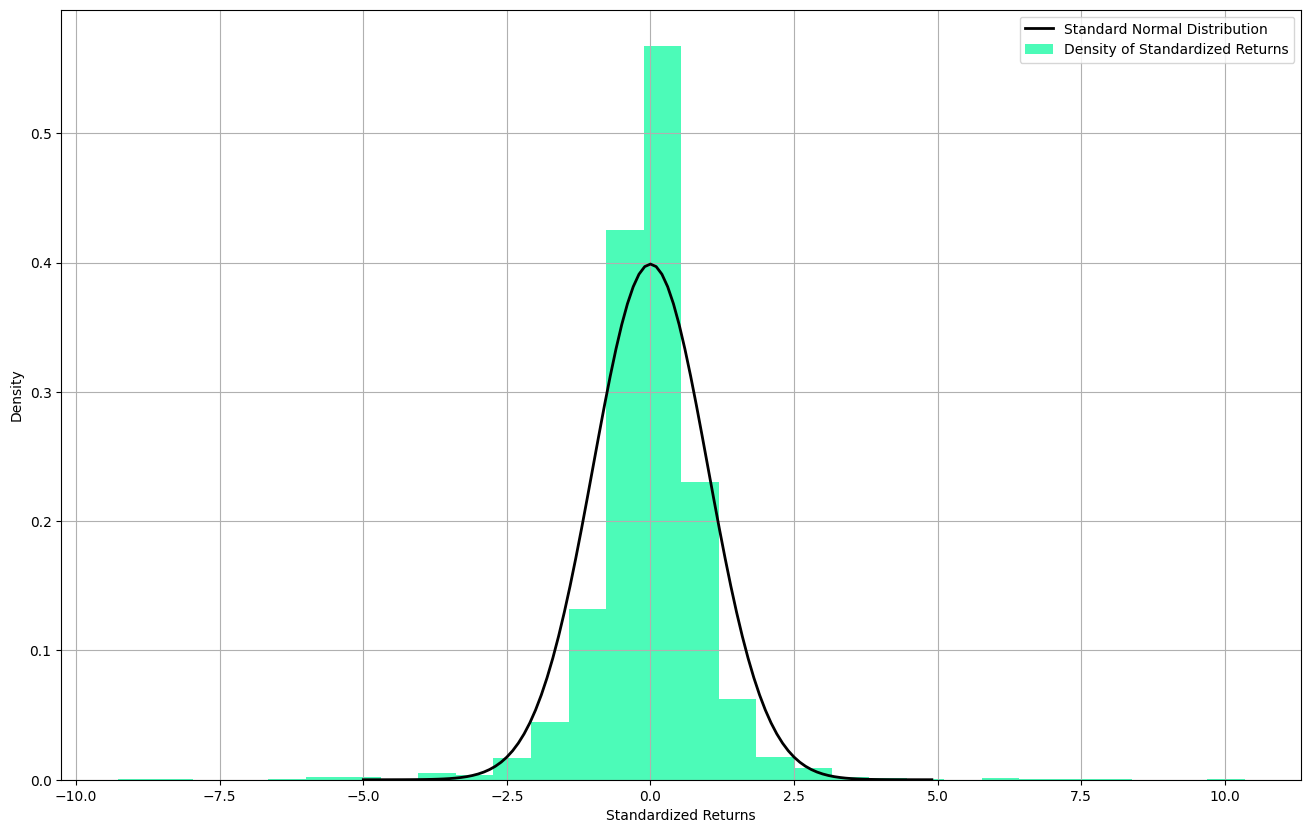

For GS: 
the Hurst exponent using Zhang is: 0.45 
using MMAR alpha is 0.11 and Hurst is 0.3592891326761864


### Processing WMT

[*********************100%%**********************]  1 of 1 completed


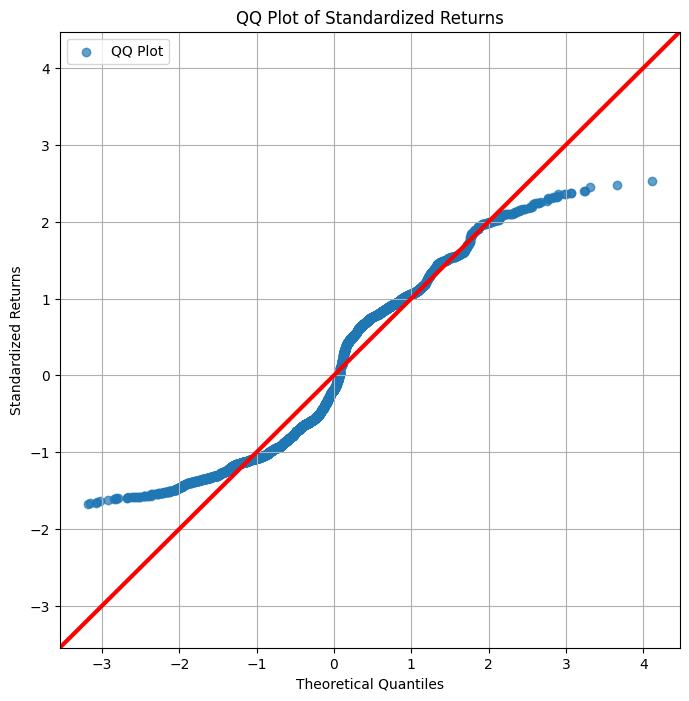

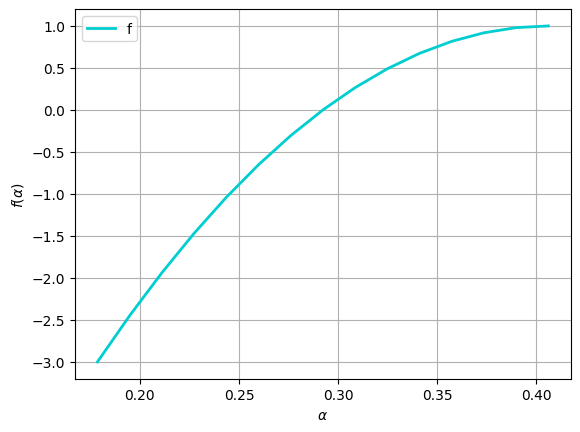

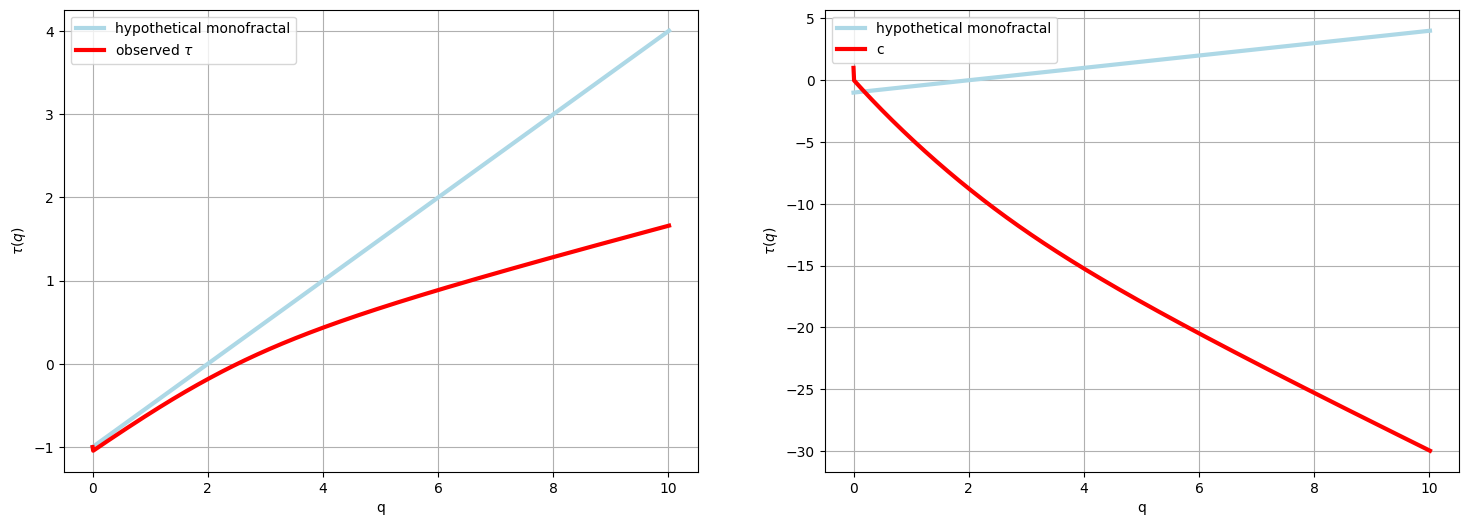

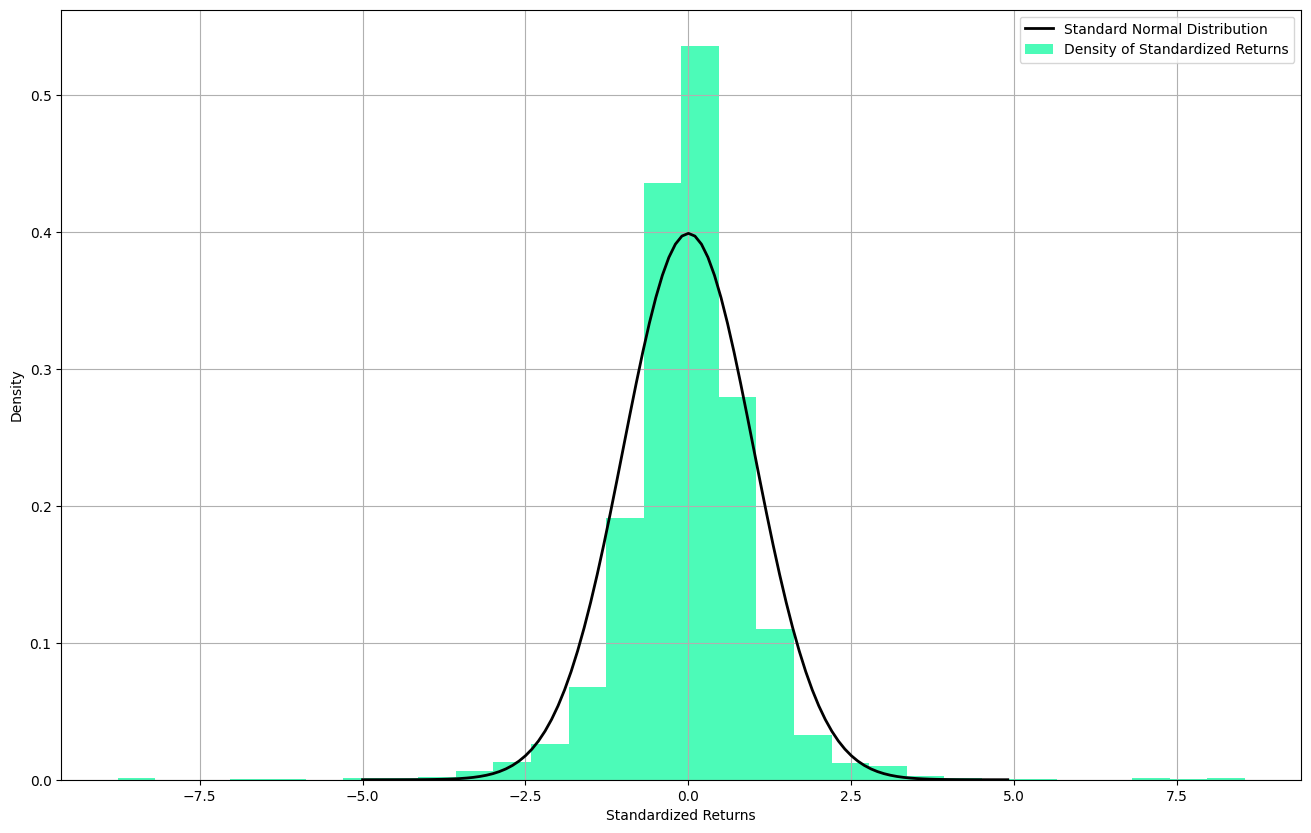

For WMT: 
the Hurst exponent using Zhang is: 0.46 
using MMAR alpha is 0.18 and Hurst is 0.3978761087246923


### Processing NFLX

[*********************100%%**********************]  1 of 1 completed


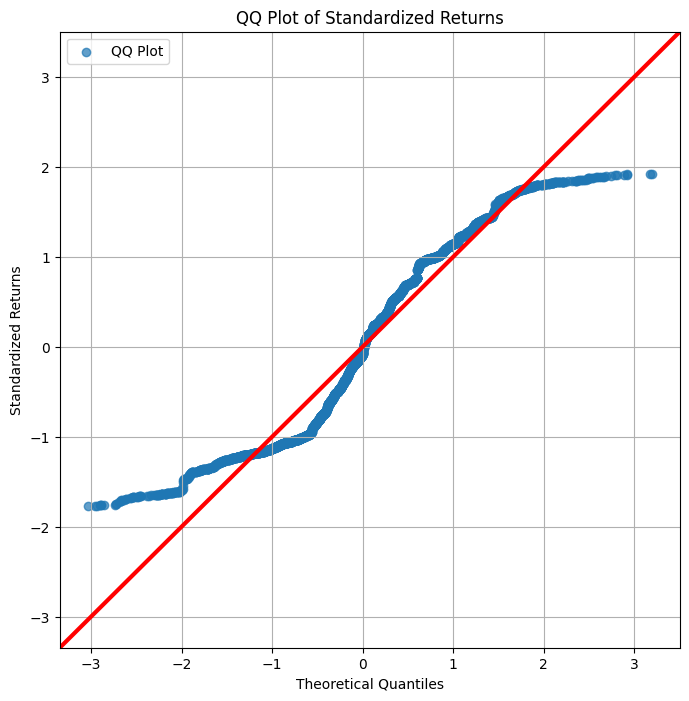

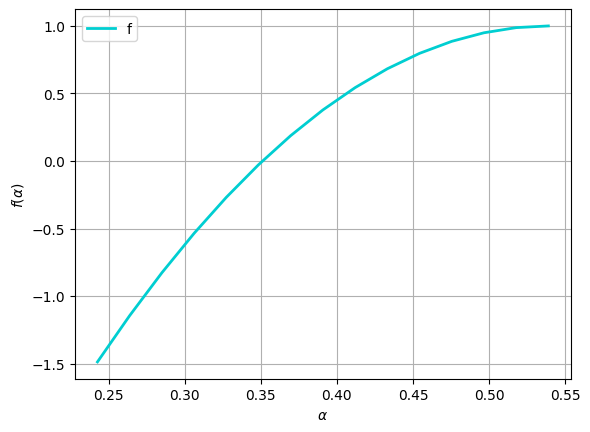

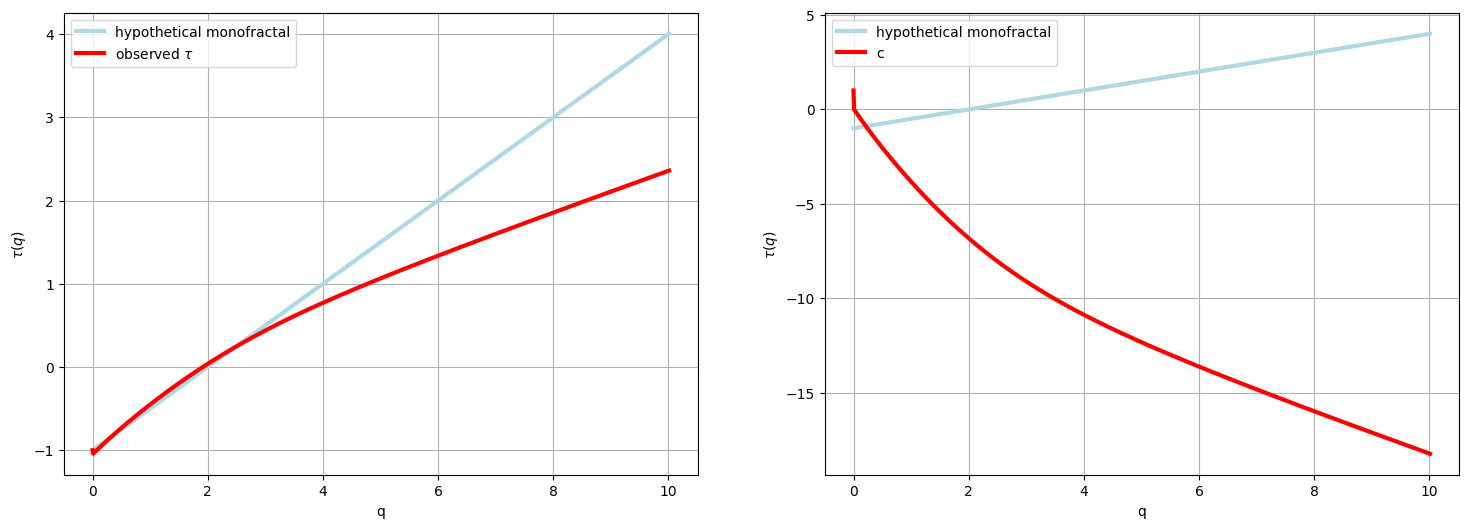

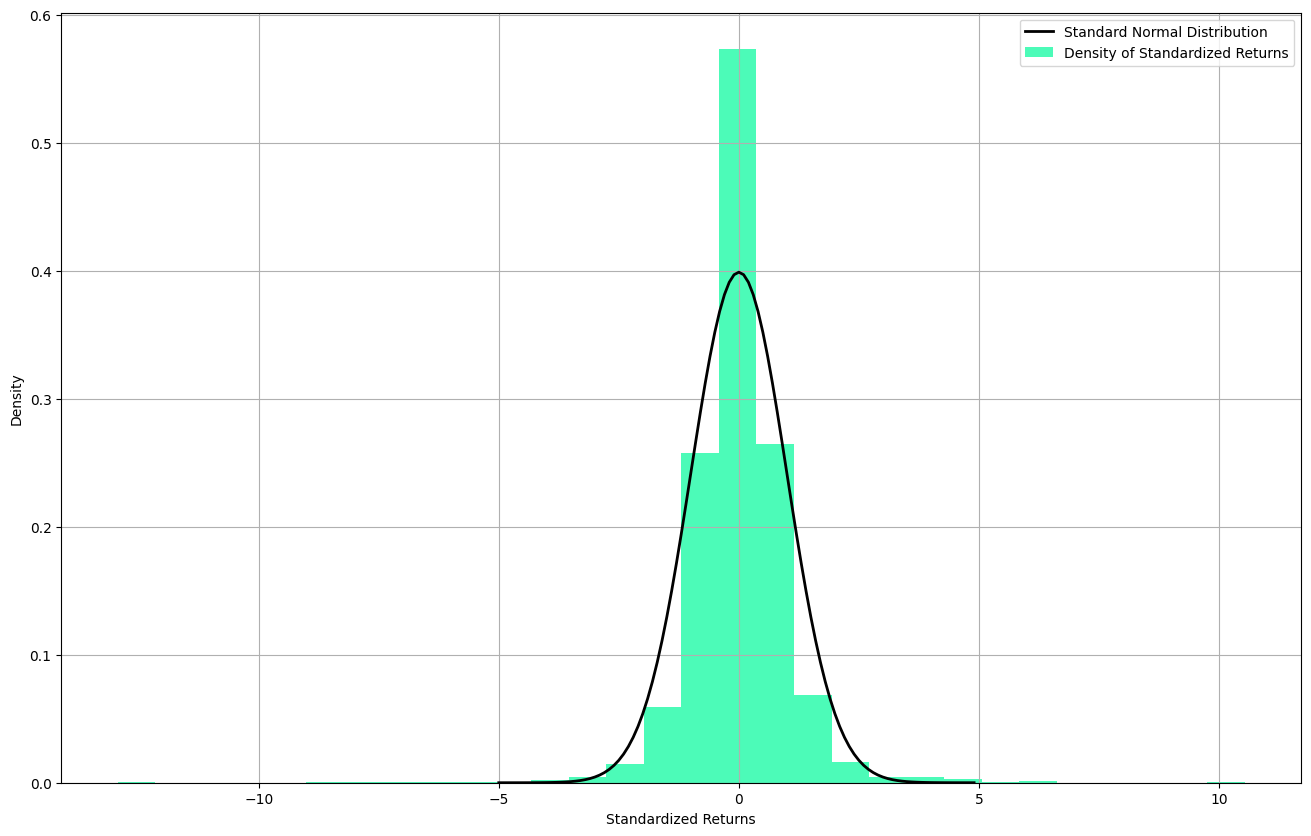

For NFLX: 
the Hurst exponent using Zhang is: 0.47 
using MMAR alpha is 0.24 and Hurst is 0.5220839286325374


In [5]:
for ticker in tickers:
    display(Markdown(f"### Processing {ticker}"))
    df = yf.download(ticker, start=start_date, end=end_date)
    HSolver = HurstIndexSolver()
    max_scale = 100
    H = HSolver.EstHurstLSSD(np.diff(df["Close"].values), max_scale=max_scale)
    mmar = MMAR(df["Close"], volume=df["Volume"])
    mmar.plot_qq()
    mmar.plot_alpha()
    mmar.plot_scaling()
    mmar.plot_density()
    print(
        f"For {ticker}: \nthe Hurst exponent using Zhang is: {H:.2f} \nusing MMAR alpha is {mmar.get_alpha_min():.2f} and Hurst is {mmar.get_hurst()}"
    )